## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Data

In [2]:
df = pd.read_excel('space_launches_advanced_report.xlsx')

df['Country'] = df['Launch Pad'].apply(lambda x: x.split(',')[-1].strip() if ',' in x else 'Unknown')

df.head()

,Name,Date (Central Time),Status,Provider,Rocket,Mission,Launch Pad,Country
0,Sputnik 8K74PS | Sputnik 1,1957-10-04 09:28 AM,Launch Successful,Soviet Space Program,Sputnik 8K74PS,Sputnik 1,"1/5 | Baikonur Cosmodrome, Republic of Kazakhstan",Republic of Kazakhstan
1,Sputnik 8K74PS | Sputnik 2,1957-11-02 02:30 PM,Launch Successful,Soviet Space Program,Sputnik 8K74PS,Sputnik 2,"1/5 | Baikonur Cosmodrome, Republic of Kazakhstan",Republic of Kazakhstan
2,Vanguard | Vanguard,1957-12-06 04:44 AM,Launch Failure,US Navy,Vanguard,Vanguard,"Launch Complex 18A | Cape Canaveral, FL, USA",USA
3,Juno-I | Explorer 1,1958-01-31 03:47 PM,Launch Successful,Army Ballistic Missile Agency,Juno-I,Explorer 1,"Launch Complex 26A | Cape Canaveral, FL, USA",USA
4,Vanguard | Vanguard,1958-02-04 07:33 PM,Launch Failure,US Navy,Vanguard,Vanguard,"Launch Complex 18A | Cape Canaveral, FL, USA",USA


In [3]:
df_past = df[(df['Status'] != 'Go for Launch') & (df['Status'] != 'To Be Confirmed') & (df['Status'] != 'To Be Determined')] 

df_future = df[(df['Status'] != 'Launch Successful') & (df['Status'] != 'Launch Failure') & (df['Status'] != 'Launch was a Partial Failure')] 

## Exploration

### Who has launched the most rockets in the past?

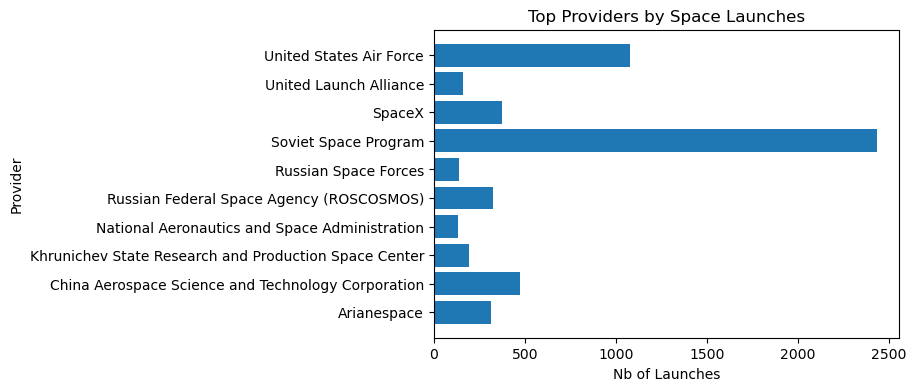

In [4]:
nb_missions = df_past.groupby(by='Provider')['Name'].count().reset_index(name='nb_missions')
nb_missions1 = nb_missions[nb_missions['nb_missions'] > 100]

plt.figure(figsize=(6, 4))
plt.barh(nb_missions1['Provider'], nb_missions1['nb_missions'])
plt.xlabel('Nb of Launches')
plt.ylabel('Provider')
plt.title("Top Providers by Space Launches")
plt.show()


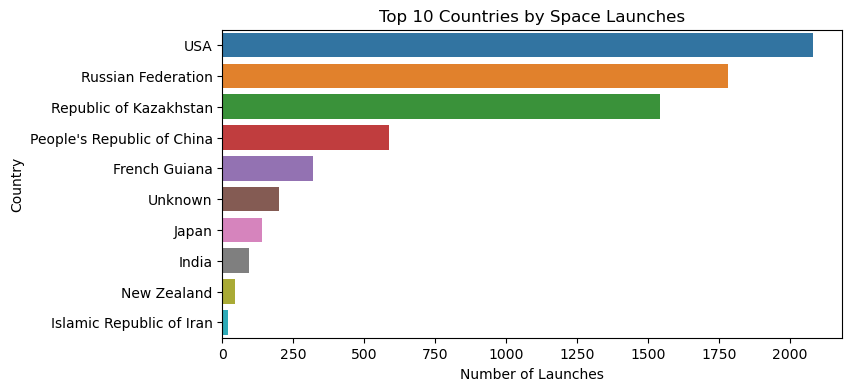

In [5]:
top_countries = df_past['Country'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.xlabel("Number of Launches")
plt.ylabel("Country")
plt.title("Top 10 Countries by Space Launches")
plt.show()

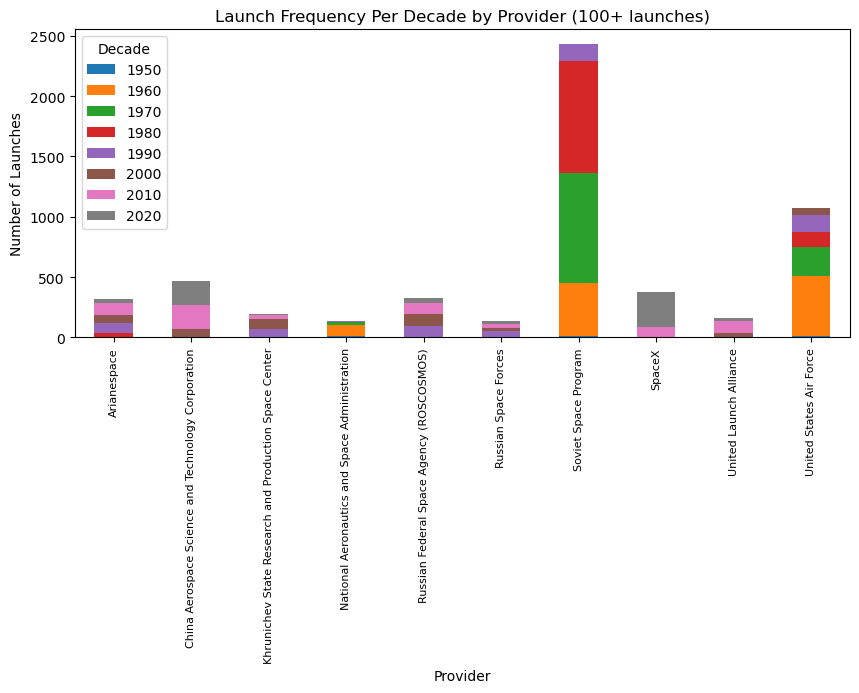

In [6]:
df_past = df_past.copy()

df_past.loc[:, 'Date'] = pd.to_datetime(df_past['Date (Central Time)'])
df_past['Month'] = df_past['Date'].dt.month
df_past.loc[:, 'Year'] = df_past['Date'].dt.year
df_past.loc[:, 'Decade'] = (df_past['Year'] // 10) * 10


launches_per_decade = df_past.groupby(['Provider', 'Decade']).size().unstack(fill_value=0)
launches_per_provider = df_past.groupby('Provider').size()
valid_providers = launches_per_provider[launches_per_provider >= 100].index

launches_per_decade_filtered = launches_per_decade.loc[valid_providers]

launches_per_decade_filtered.plot(kind='bar', stacked=True, figsize=(10, 4))
plt.xlabel("Provider")
plt.ylabel("Number of Launches")
plt.title("Launch Frequency Per Decade by Provider (100+ launches)")
plt.xticks(rotation=90, size = 8)
plt.show()

### Which years were the most active?

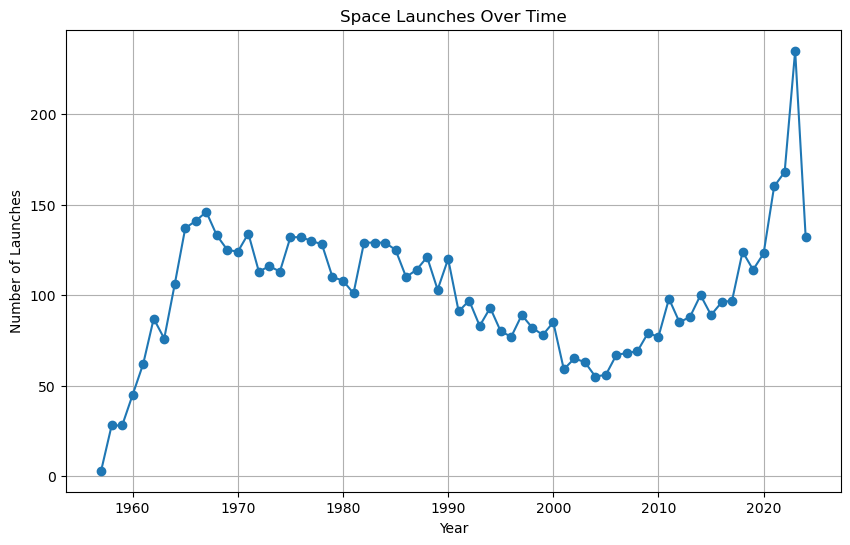

In [7]:
launches_per_year = df_past.groupby('Year').size()

plt.figure(figsize=(10, 6))
plt.plot(launches_per_year.index, launches_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Space Launches Over Time')
plt.grid(True)
plt.show()


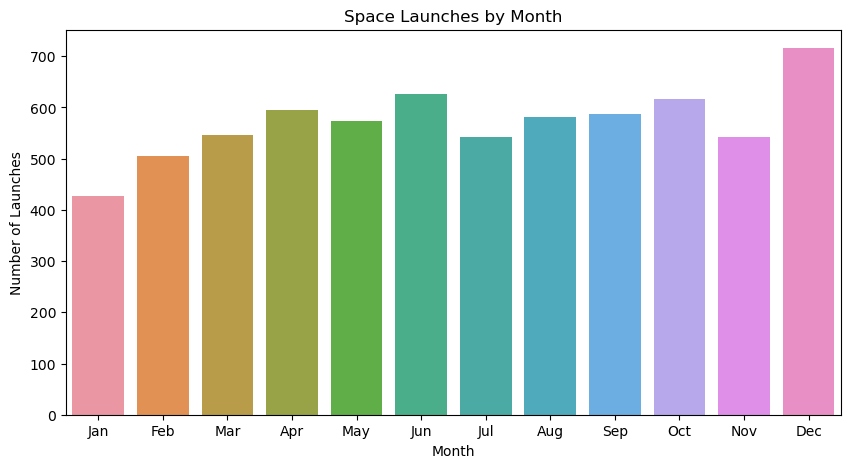

In [8]:
launches_per_month = df_past.groupby('Month').size()

plt.figure(figsize=(10, 5))
sns.barplot(x=launches_per_month.index, y=launches_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.title('Space Launches by Month')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


### Which rockets were the most used?

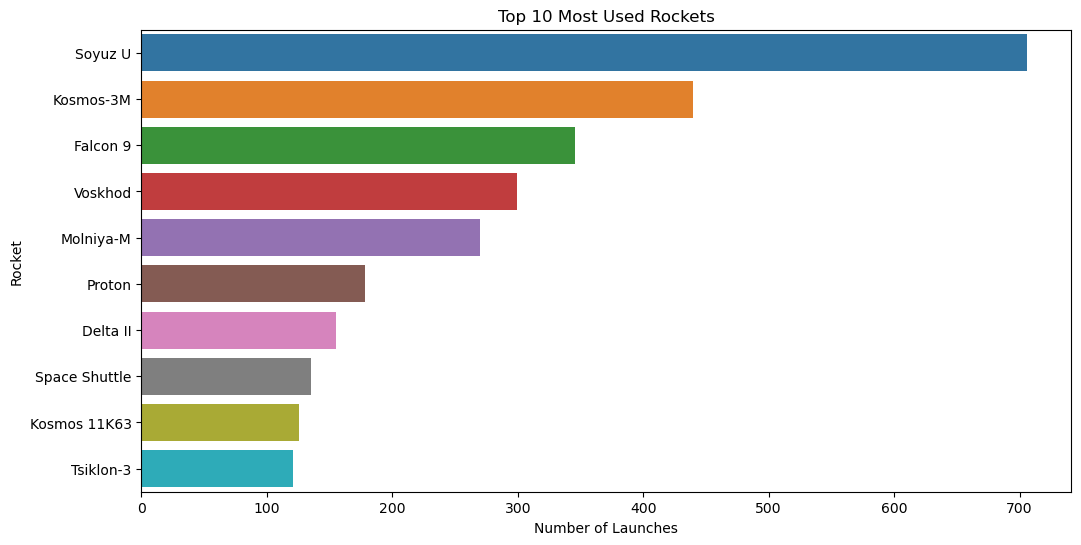

In [9]:
top_rockets = df_past['Rocket'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_rockets.index, x=top_rockets.values)
plt.xlabel("Number of Launches")
plt.ylabel("Rocket")
plt.title("Top 10 Most Used Rockets")
plt.show()


### Which launches are successful?

<Figure size 1200x600 with 0 Axes>

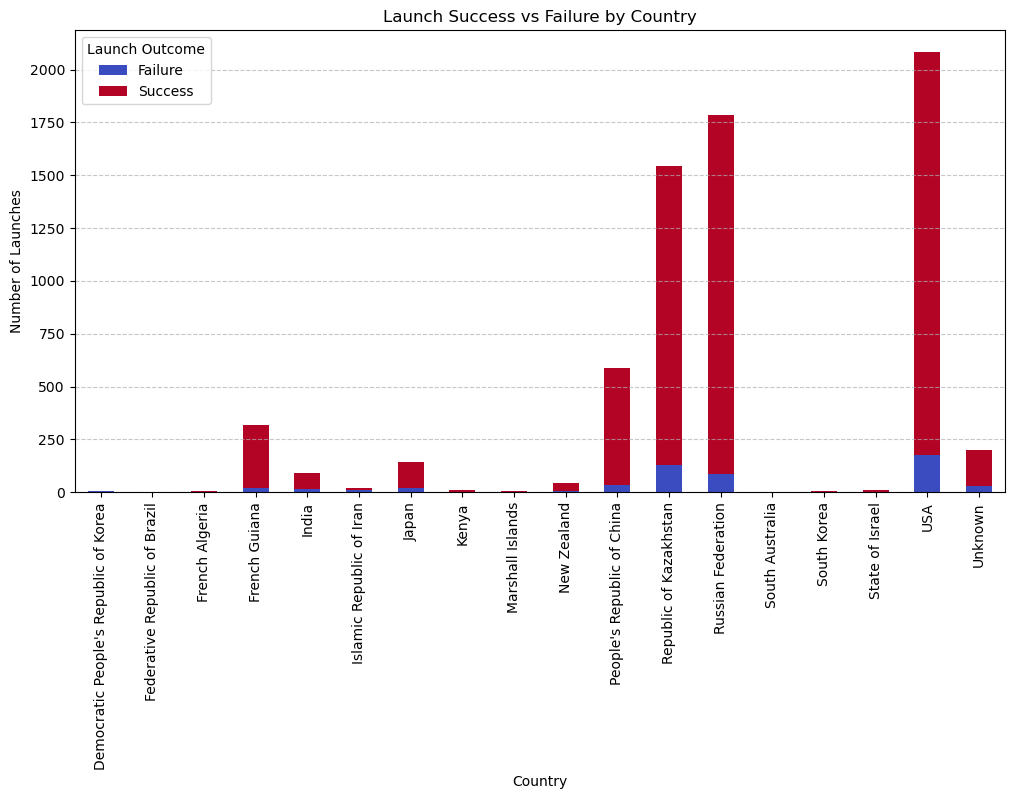

In [10]:
df_past = df_past.copy()

df_past['Launch Outcome'] = df_past['Status'].apply(lambda x: 'Success' if 'Successful' in x else 'Failure')

country_success = df_past.groupby(['Country', 'Launch Outcome']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))

country_success.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

plt.xlabel("Country")
plt.ylabel("Number of Launches")
plt.title("Launch Success vs Failure by Country")
plt.xticks(rotation=90)
plt.legend(title="Launch Outcome")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Data Story
choose your time window
Here cut the data up into time windows -> big eras 
-> info on who is the most prominent players during that time window

choose your provider 
Here we list the top providers of that era from which you can choose one
-> info on the providers, achievements, … a viz 

choose your rocket
-> info in the rocket itself, thrust, stats, … a viz 


In [11]:
df_past.head()

,Name,Date (Central Time),Status,Provider,Rocket,Mission,Launch Pad,Country,Date,Month,Year,Decade,Launch Outcome
0,Sputnik 8K74PS | Sputnik 1,1957-10-04 09:28 AM,Launch Successful,Soviet Space Program,Sputnik 8K74PS,Sputnik 1,"1/5 | Baikonur Cosmodrome, Republic of Kazakhstan",Republic of Kazakhstan,1957-10-04 09:28:00,10,1957,1950,Success
1,Sputnik 8K74PS | Sputnik 2,1957-11-02 02:30 PM,Launch Successful,Soviet Space Program,Sputnik 8K74PS,Sputnik 2,"1/5 | Baikonur Cosmodrome, Republic of Kazakhstan",Republic of Kazakhstan,1957-11-02 14:30:00,11,1957,1950,Success
2,Vanguard | Vanguard,1957-12-06 04:44 AM,Launch Failure,US Navy,Vanguard,Vanguard,"Launch Complex 18A | Cape Canaveral, FL, USA",USA,1957-12-06 04:44:00,12,1957,1950,Failure
3,Juno-I | Explorer 1,1958-01-31 03:47 PM,Launch Successful,Army Ballistic Missile Agency,Juno-I,Explorer 1,"Launch Complex 26A | Cape Canaveral, FL, USA",USA,1958-01-31 15:47:00,1,1958,1950,Success
4,Vanguard | Vanguard,1958-02-04 07:33 PM,Launch Failure,US Navy,Vanguard,Vanguard,"Launch Complex 18A | Cape Canaveral, FL, USA",USA,1958-02-04 19:33:00,2,1958,1950,Failure


In [48]:
df['Date (Central Time)'] = pd.to_datetime(df['Date (Central Time)'], format='%Y-%m-%d %I:%M %p')

# Split into 4 dataframes based on the year
df_1957_1975 = df[(df['Date (Central Time)'].dt.year >= 1957) & (df['Date (Central Time)'].dt.year < 1975)]
df_1975_1990 = df[(df['Date (Central Time)'].dt.year >= 1975) & (df['Date (Central Time)'].dt.year < 1990)]
df_1990_2010 = df[(df['Date (Central Time)'].dt.year >= 1990) & (df['Date (Central Time)'].dt.year < 2010)]
df_2010_present = df[df['Date (Central Time)'].dt.year >= 2010]

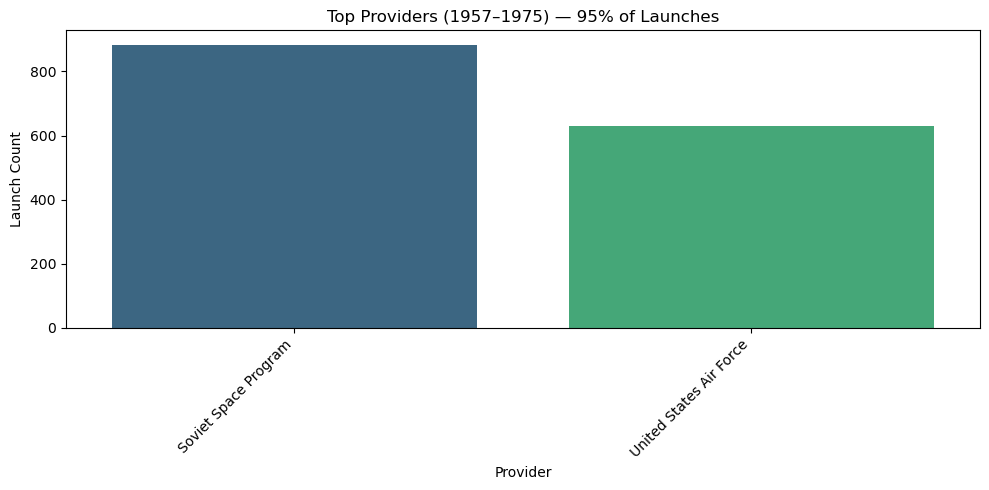

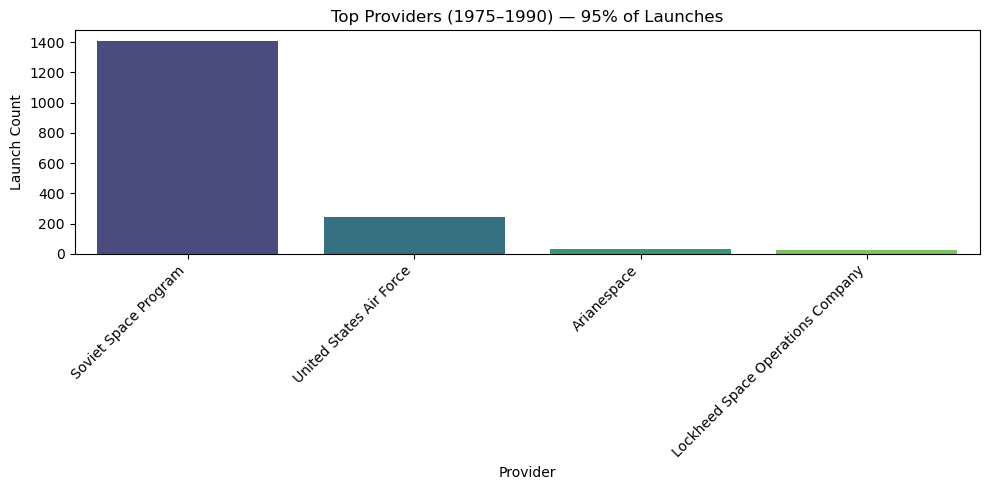

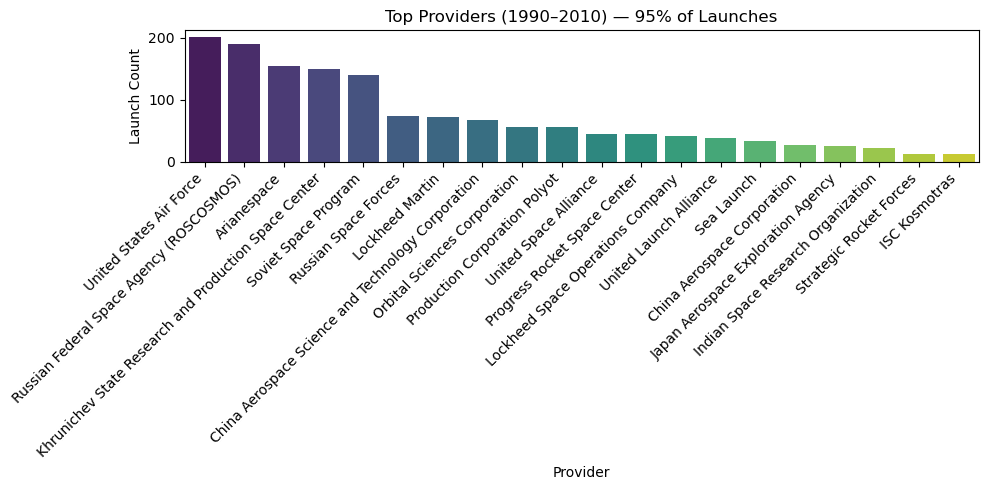

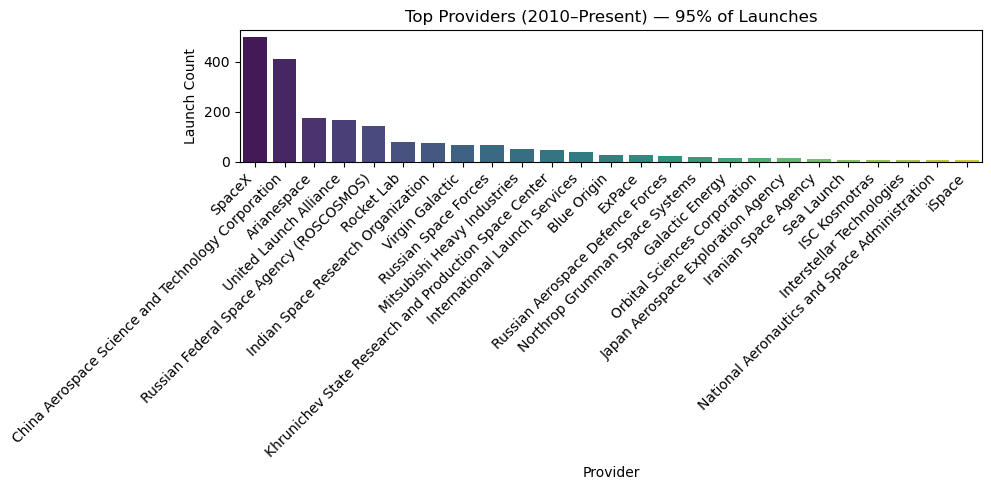

In [46]:
def plot_top_providers(df_period, title, percentage, print_on = True):
    plt.figure(figsize=(10, 5))

    provider_counts = df_period['Provider'].value_counts().reset_index()
    provider_counts.columns = ['Provider', 'Launch Count']

    provider_counts['Cumulative %'] = provider_counts['Launch Count'].cumsum() / provider_counts['Launch Count'].sum()
    top_providers = provider_counts[provider_counts['Cumulative %'] <= percentage]
    if print_on :
        print(f"\nTop providers for {title}:")
        print(top_providers[['Provider', 'Launch Count']].to_string(index=False))

    sns.barplot(data=top_providers, x='Provider', y='Launch Count', palette='viridis')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_top_providers(df_1957_1975, 'Top Providers (1957–1975) — 95% of Launches', 0.95, False)
plot_top_providers(df_1975_1990, 'Top Providers (1975–1990) — 95% of Launches', 0.95, False)
plot_top_providers(df_1990_2010, 'Top Providers (1990–2010) — 95% of Launches',0.95, False)
plot_top_providers(df_2010_present, 'Top Providers (2010–Present) — 95% of Launches',0.95, False)


### Mid Results

From the previous analysis, here are the top launch providers during each of the four periods:


🚀 **The Dawn of Space & the Space Race (1957–1975) :**
Soviet Space Program,
United States Air Force

🌐 **Stabilization & Early Cooperation (1975–1990) :**
Soviet Space Program,
United States Air Force,
Ariane Space,
Lockheed Space Operations Company

🌍 **International Collaboration & the ISS Era (1990–2010) :**
United States Air Force,
Russian Federal Space Agency,
Ariane Space,
Khrunichev State Research and Production Space Center,
Soviet Space Program,
Russian Space Forces,
Lockheed Martin,
China Aerospace Science and Technology Corporation,
Orbital Sciences Corporation,
Production Corporation Polyot,
United Space Alliance,
Progress Rocket Space Center,
Lockheed Space Operations Company,
United Launch Alliance,
Sea Launch,
China Aerospace Corporation,
Japan Aerospace Exploration Agency,
Indian Space Research Organization,
Strategic Rocket Forces,
ISC Kosmotras,

🌌 **Global Expansion & New Space (2010–Present) :** 
SpaceX,
China Aerospace Science and Technology Corporation,
Arianespace,
United Launch Alliance,
Russian Federal Space Agency (ROSCOSMOS),
Rocket Lab,
Indian Space Research Organization,
Virgin Galactic,
Russian Space Forces,
Mitsubishi Heavy Industries,
Khrunichev State Research and Production Center,
International Launch Services,
Blue Origin,
ExPace,
Russian Aerospace Defence Forces,
Northrop Grumman Space Systems,
Galactic Energy,
Orbital Sciences Corporation,
Japan Aerospace Exploration Agency,
Iranian Space Agency,
Sea Launch,
ISC Kosmotras,
Interstellar Technologies,
NASA,
iSpace

### 🇷🇺 Why are there multiple Russian providers?
Historical Transitions (USSR → Russia):

Before 1991, space operations were under the Soviet Space Program, which was a state-controlled umbrella organization.

After the USSR collapsed, Russia's space efforts fragmented into different organizations, each responsible for a part of the previous Soviet infrastructure.

Multiple Specialized Entities:
Post-1991, different agencies, research centers, and military branches were involved in launches. Some key ones:

Provider Name	Role
Russian Federal Space Agency (ROSCOSMOS)	Civilian agency coordinating space activities (like NASA).
Khrunichev State Research and Production Space Center	Manufacturer of Proton rockets and other hardware.
Russian Space Forces	Military branch in charge of military launches.
Progress Rocket Space Center	Manufacturer of Soyuz launch vehicles.
Strategic Rocket Forces	Originally military, handled ICBMs and some satellite launches.
ISC Kosmotras	Joint Russian-Ukrainian venture, used converted ICBMs for satellite launches.
Separation of Builder vs. Operator:
In the data, some providers are manufacturers, while others are launch operators or coordinators. Unlike NASA, which designs, builds, and launches, Russia has more segmentation:

e.g., Khrunichev builds rockets.

e.g., ROSCOSMOS manages missions and coordination.

e.g., Russian Space Forces launches military satellites.

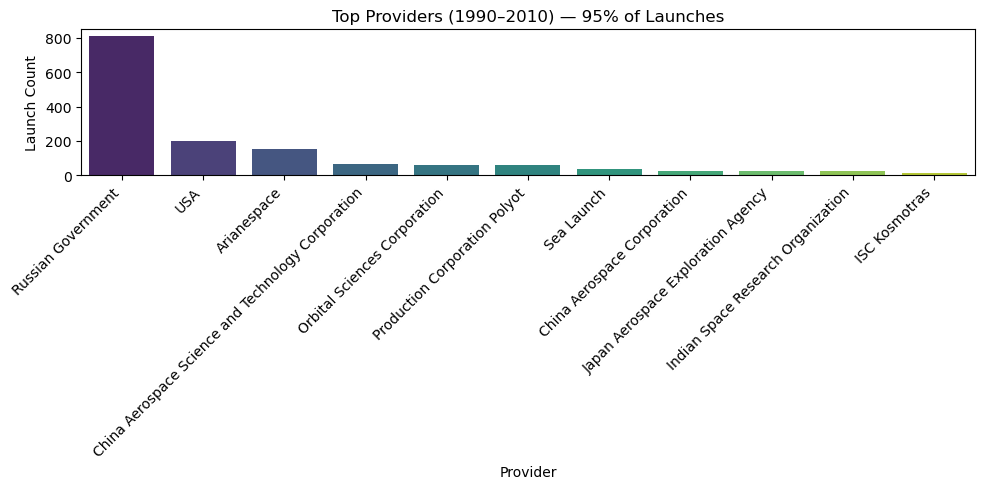

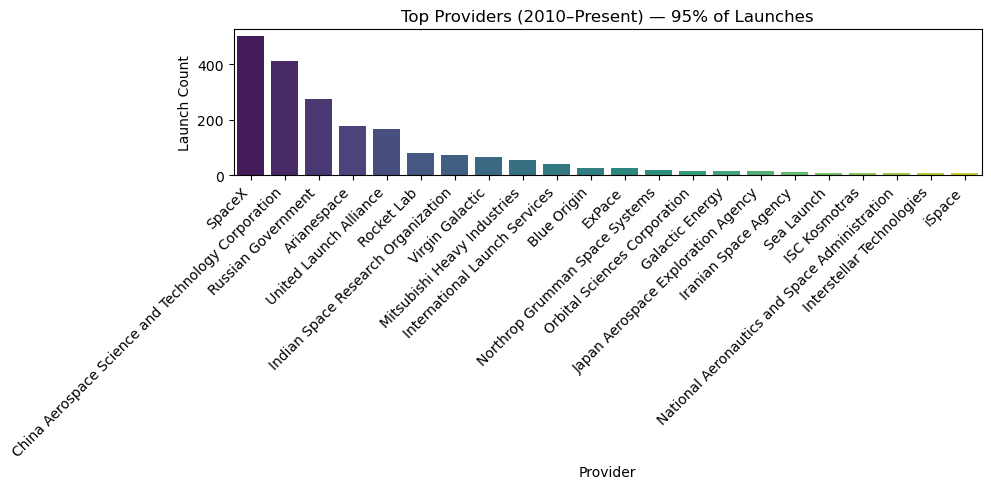

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping for government groups
Russian_1990_2010_govt = {
    "Russian Federal Space Agency (ROSCOSMOS)": "Russian Government",
    "Russian Aerospace Defence Forces": "Russian Government",
    "Russian Space Forces": "Russian Government",
    "Progress Rocket Space Center": "Russian Government",
    "Russian Federal Space Agency": "Russian Government",
    "Strategic Rocket Forces": "Russian Government",
    "Soviet Space Program": "Russian Government",
    "Khrunichev State Research and Production Space Center": "Russian Government",

}
USA_1990_2010_govt = {
    "United States Air Force": "USA",
    "Lockheed Martin": "Russian Government",
    "United Space Alliance": "Russian Government",
    "Lockheed Space Operations Company": "Russian Government",
    "United Launch Alliance": "Russian Government",
}



Russian_2010_present_govt = {
    "Russian Federal Space Agency (ROSCOSMOS)": "Russian Government",
    "Russian Aerospace Defence Forces": "Russian Government",
    "Russian Space Forces": "Russian Government",
    "Khrunichev State Research and Production Space Center": "Russian Government",
}


df_1990_2010.loc[:, 'Provider'] = df_1990_2010['Provider'].replace(Russian_1990_2010_govt)
df_1990_2010.loc[:, 'Provider'] = df_1990_2010['Provider'].replace(USA_1990_2010_govt)
plot_top_providers(df_1990_2010, 'Top Providers (1990–2010) — 95% of Launches', 0.95, False)

df_2010_present.loc[:, 'Provider'] = df_2010_present['Provider'].replace(Russian_2010_present_govt)
plot_top_providers(df_2010_present, 'Top Providers (2010–Present) — 95% of Launches', 0.95,False)


